In [37]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [38]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import resnet50, vgg16, vgg19, inception_v3, mobilenet
from tensorflow.keras.models import Model

In [39]:
resnet_model = resnet50.ResNet50(weights='imagenet', include_top=False)
vgg16_model = vgg16.VGG16(weights='imagenet', include_top=False)
vgg19_model = vgg19.VGG19(weights='imagenet', include_top=False)
inception_model = inception_v3.InceptionV3(weights='imagenet', include_top=False)

In [40]:
data_dir = "C:\\Users\\lohit\\Downloads\\archive (11)\\cars_train\\cars_train"
images = os.listdir(data_dir)
random_images = random.sample(images, 5)
random_images

['05612.jpg', '05962.jpg', '01393.jpg', '07401.jpg', '04951.jpg']

In [41]:
def extract_features(model, layer_names, img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    if model.name.startswith('resnet'):
        x = resnet50.preprocess_input(x)
    elif model.name.startswith('vgg'):
        x = vgg16.preprocess_input(x)
    elif model.name.startswith('inception'):
        x = inception_v3.preprocess_input(x)
    intermediate_layer_model = Model(inputs=model.input,
                                     outputs=[model.get_layer(name).output for name in layer_names])
    features = intermediate_layer_model.predict(x)
    return features

In [42]:
dataset_path = "C:\\Users\\lohit\\Downloads\\archive (11)\\cars_train\\cars_train"
images = os.listdir(dataset_path)
random_images = random.sample(images, 5)
random_images


['01964.jpg', '04608.jpg', '04219.jpg', '05657.jpg', '07395.jpg']

In [43]:
resnet_layers = ['conv1_relu', 'conv2_block3_out', 'conv5_block3_out']
vgg16_layers = ['block1_conv2', 'block3_conv3', 'block5_conv3']
vgg19_layers = ['block1_conv2', 'block3_conv4', 'block5_conv4']
inception_layers = ['mixed2', 'mixed7', 'mixed10']

Image: 01964.jpg
ResNet-50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


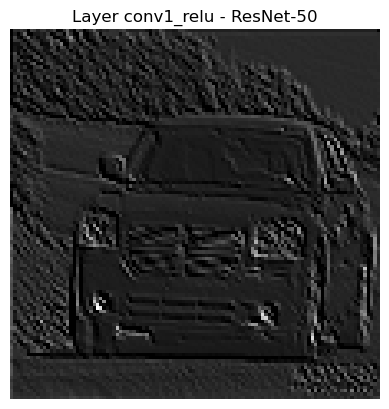

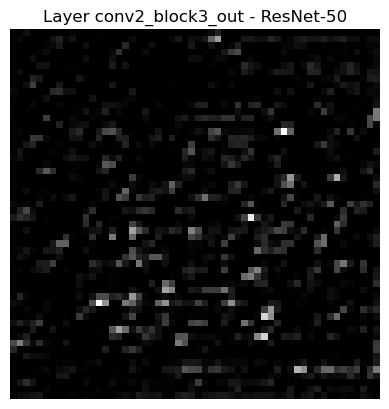

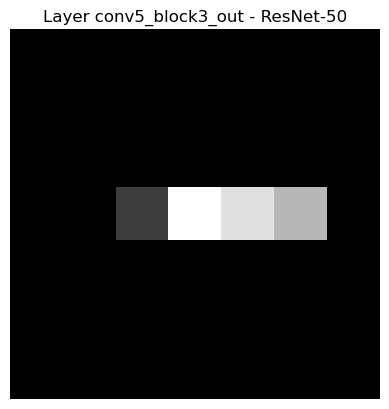

VGG16
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


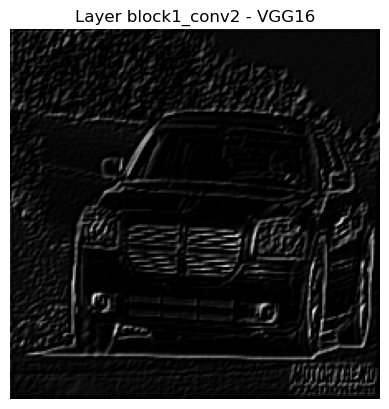

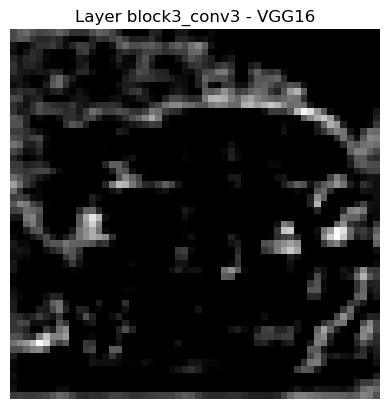

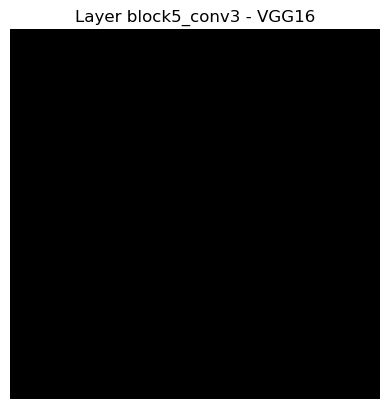

VGG19
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


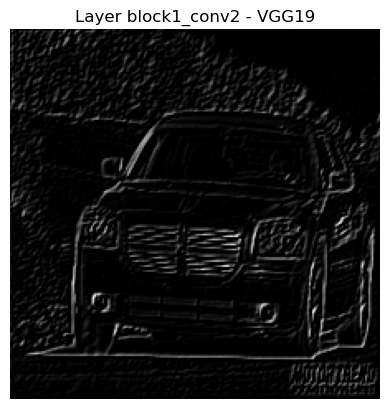

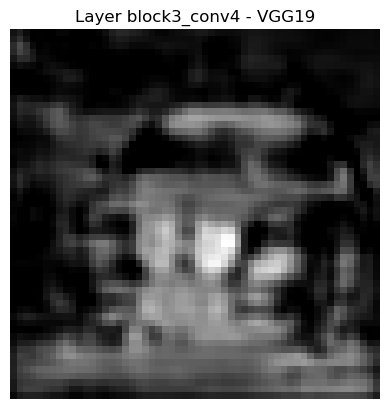

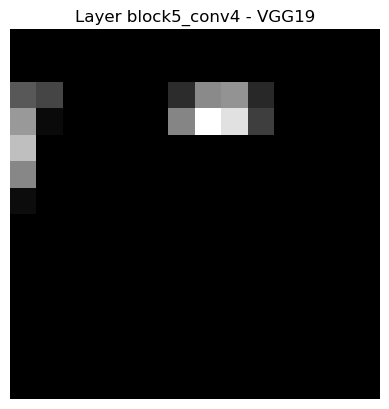

InceptionNetv3
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


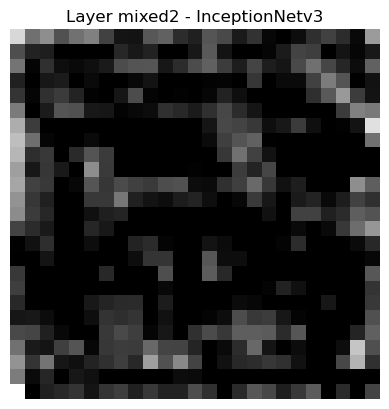

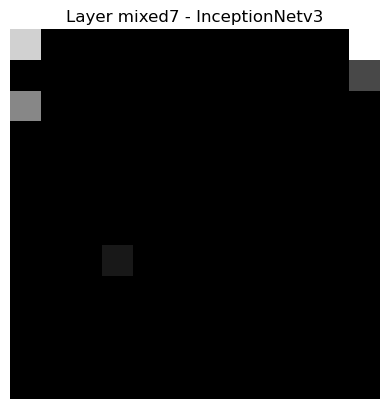

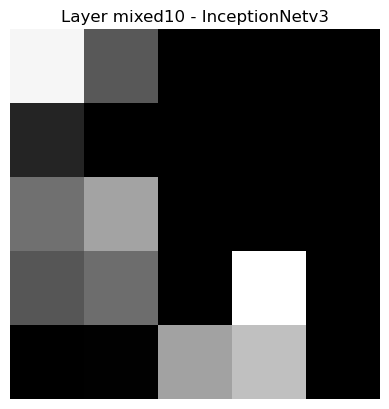

Image: 04608.jpg
ResNet-50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


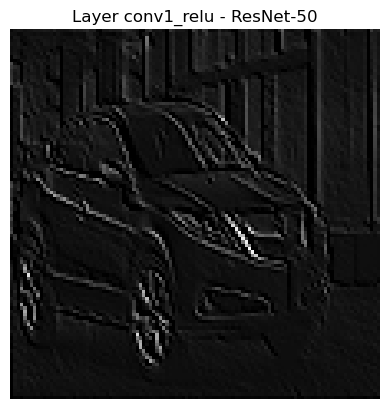

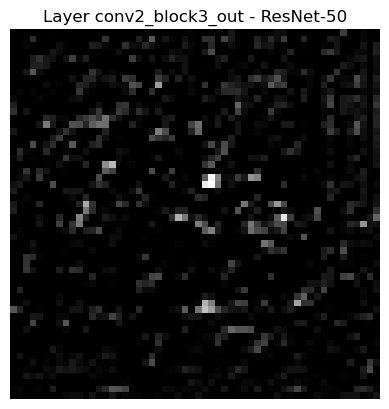

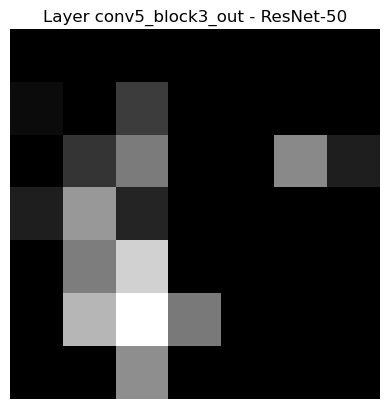

VGG16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


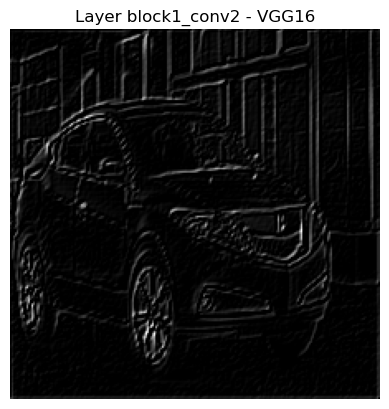

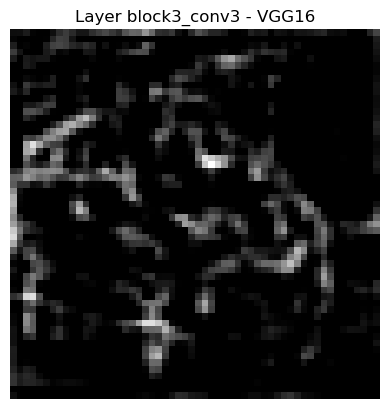

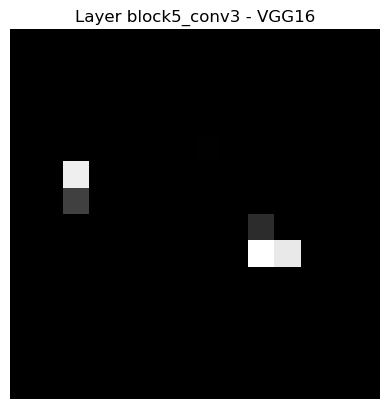

VGG19
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


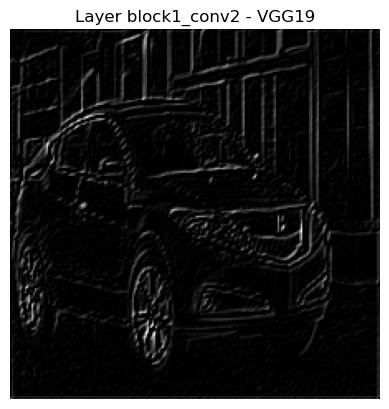

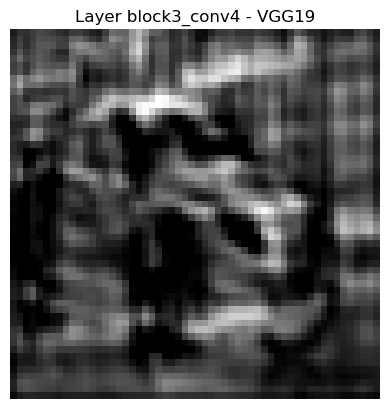

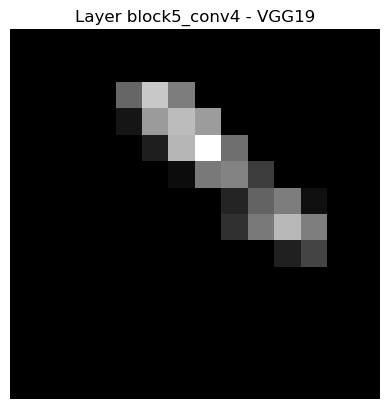

InceptionNetv3
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


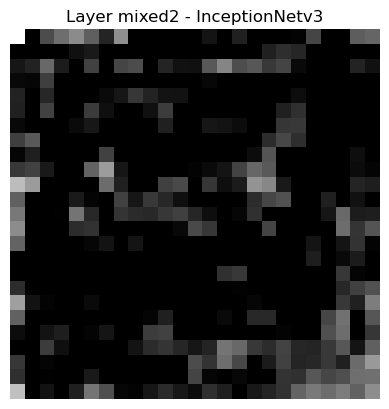

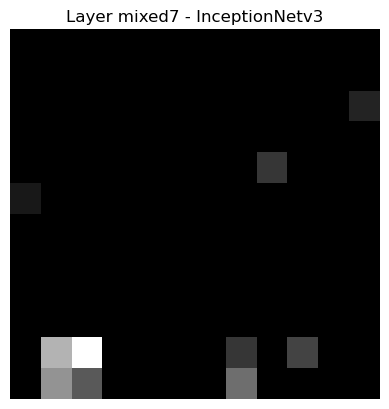

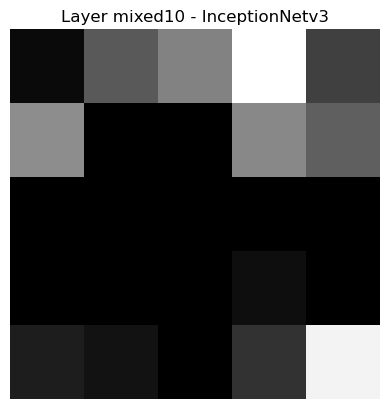

Image: 04219.jpg
ResNet-50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


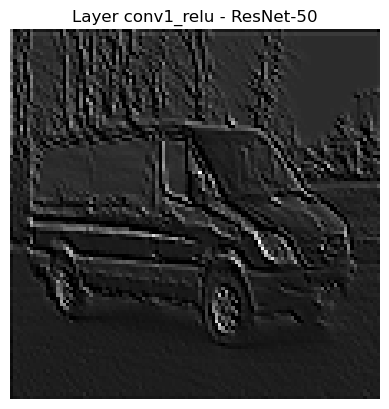

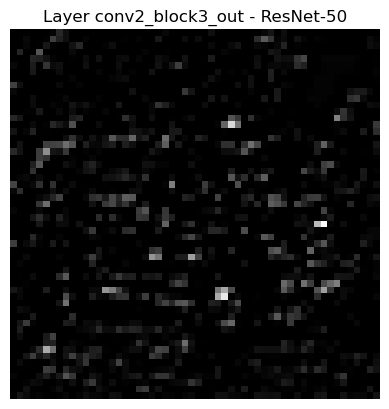

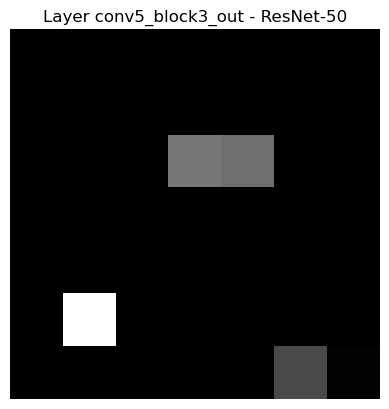

VGG16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


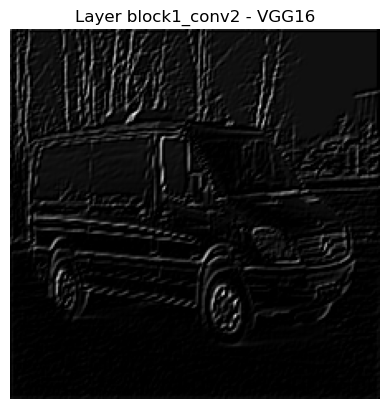

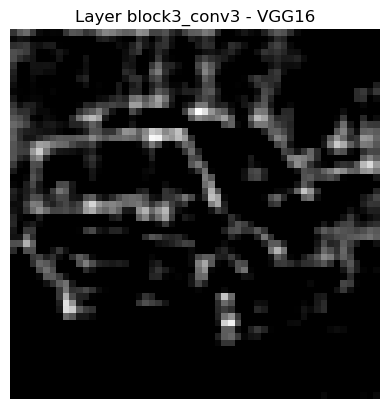

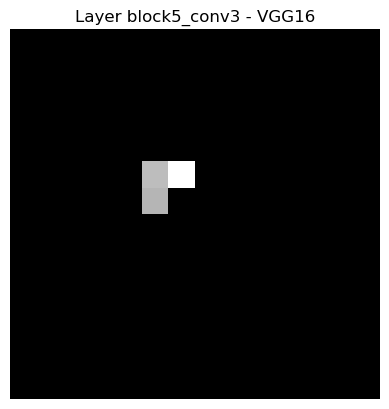

VGG19
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


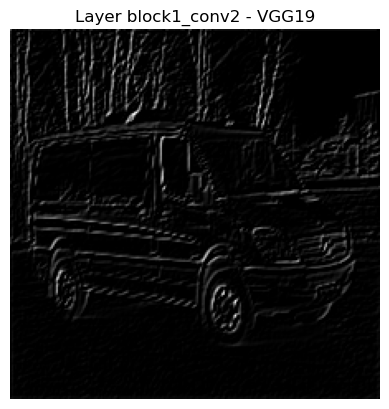

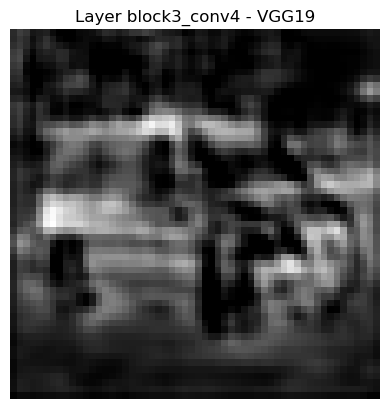

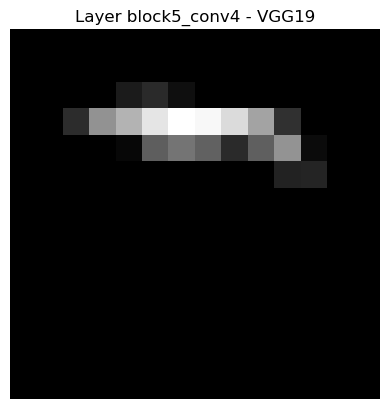

InceptionNetv3
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


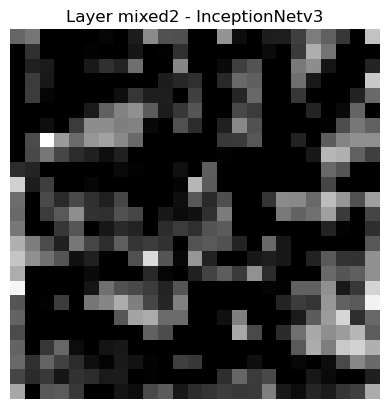

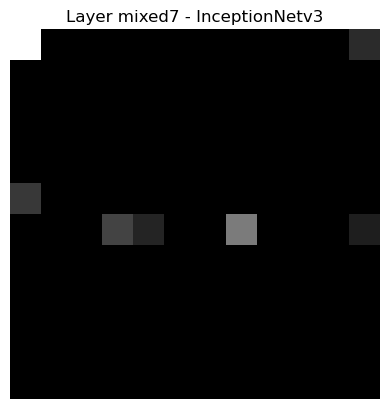

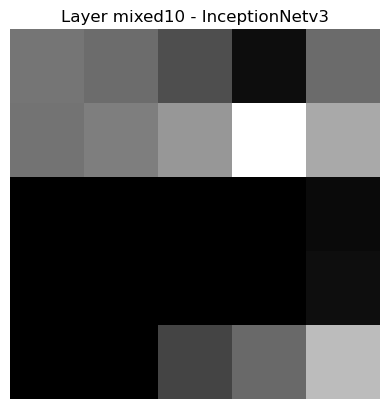

Image: 05657.jpg
ResNet-50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


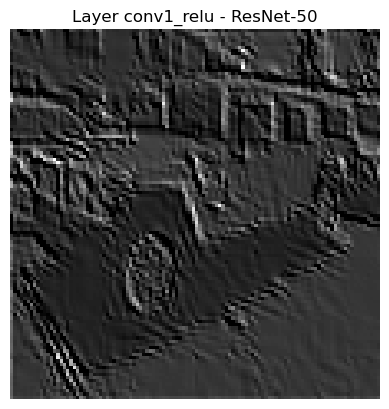

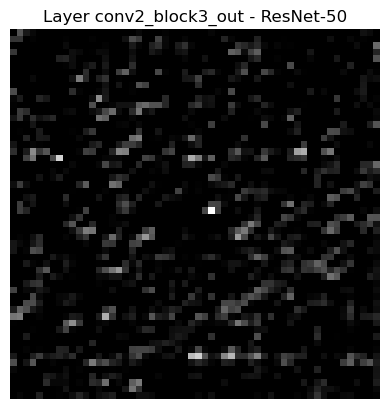

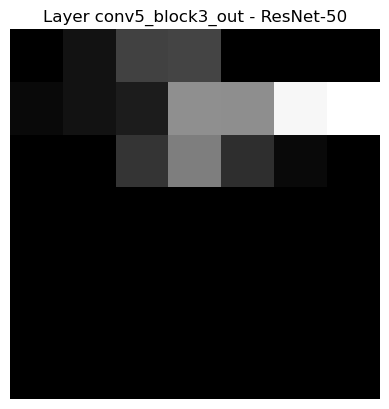

VGG16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


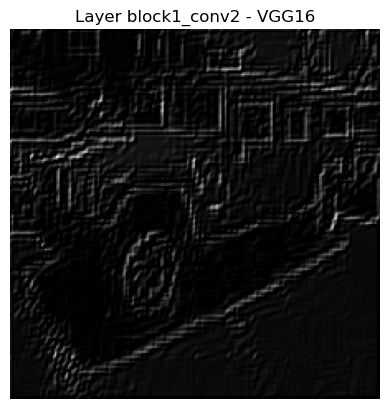

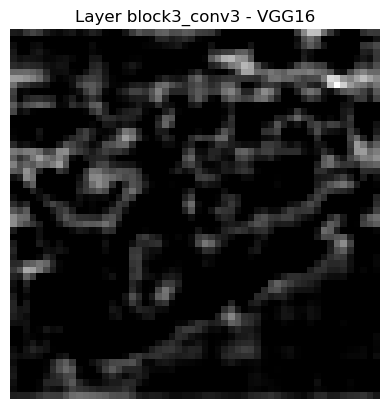

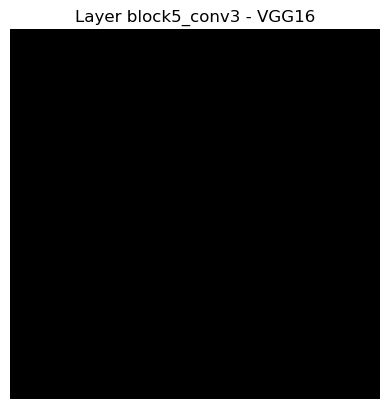

VGG19
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


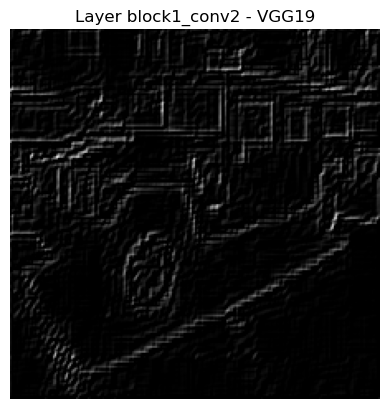

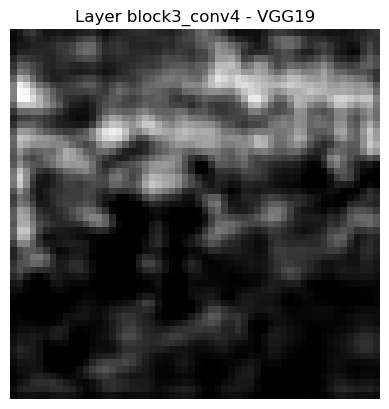

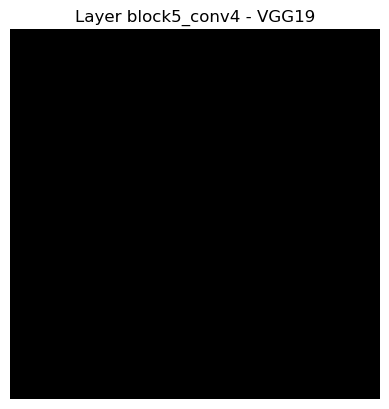

InceptionNetv3
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


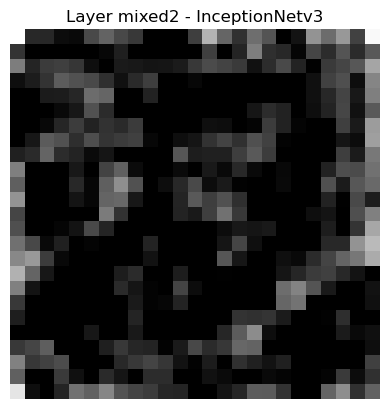

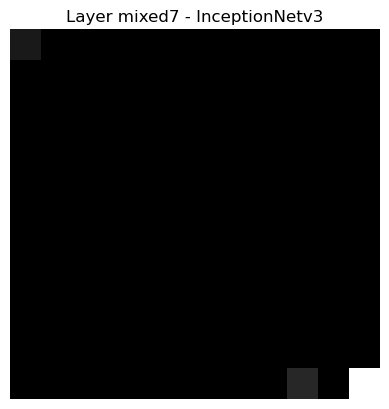

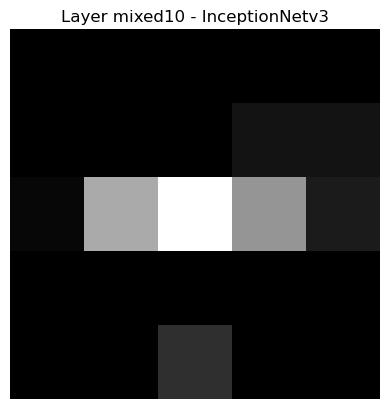

Image: 07395.jpg
ResNet-50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


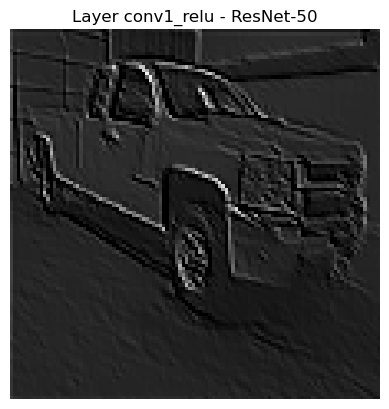

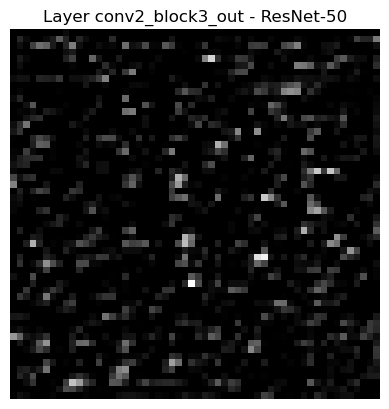

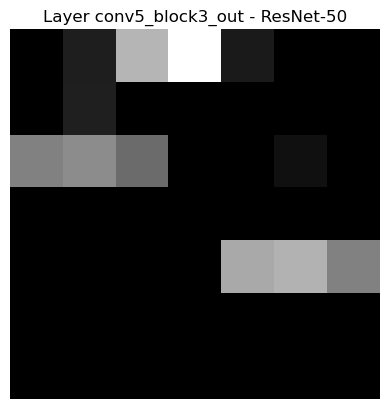

VGG16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


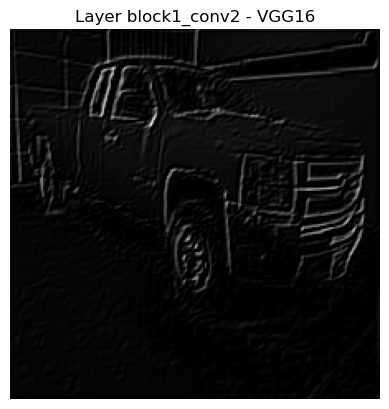

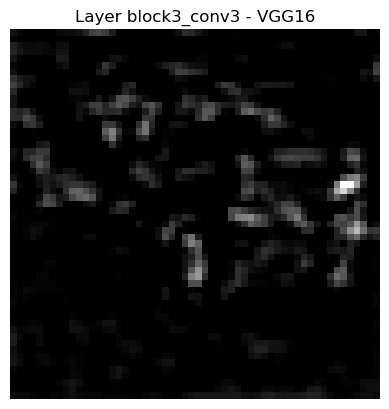

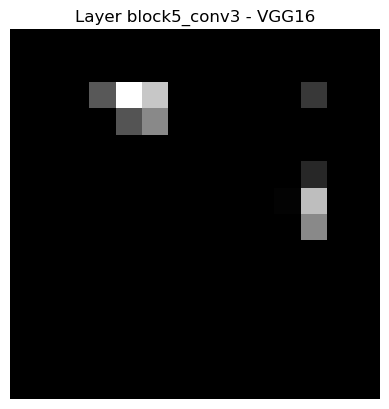

VGG19
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


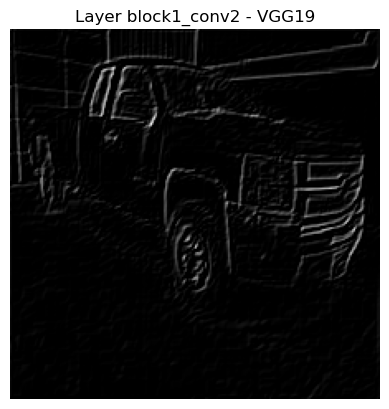

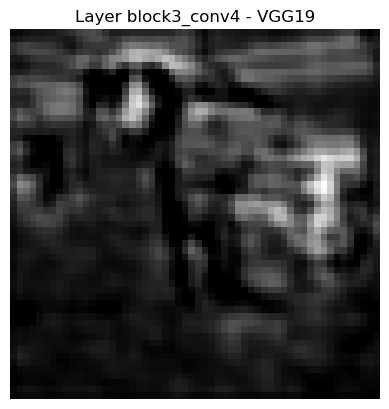

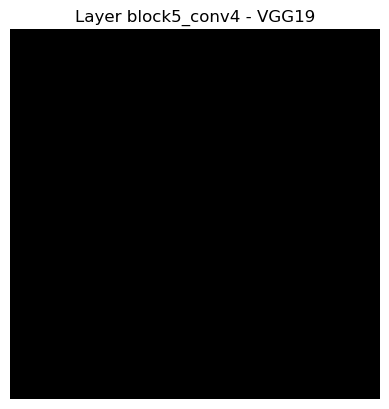

InceptionNetv3
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


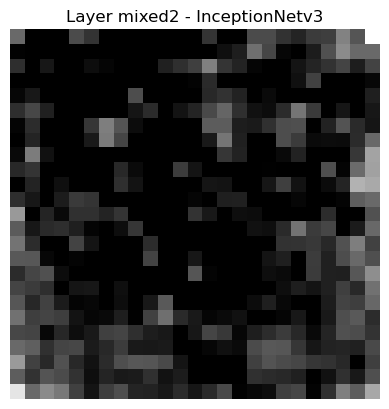

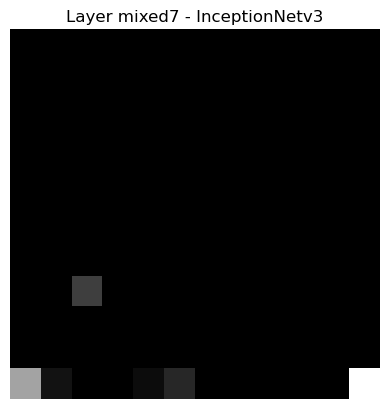

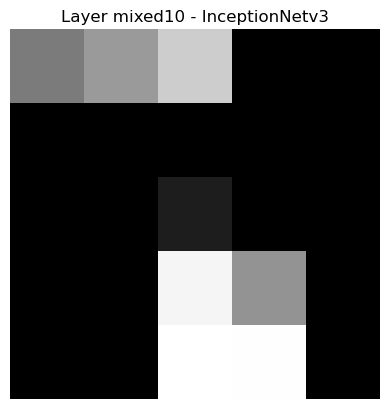

In [44]:
for img_name in random_images:
    img_path = os.path.join(data_dir, img_name)
    print("Image:", img_name)
    print("="*30)
    
    # ResNet-50
    print("ResNet-50")
    resnet_features = extract_features(resnet_model, resnet_layers, img_path)
    for i, layer_features in enumerate(resnet_features):
        plt.imshow(layer_features[0, :, :, 0], cmap='gray')
        plt.title('Layer {} - ResNet-50'.format(resnet_layers[i]))
        plt.axis('off')
        plt.show()
    
    # VGG16
    print("VGG16")
    vgg16_features = extract_features(vgg16_model, vgg16_layers, img_path)
    for i, layer_features in enumerate(vgg16_features):
        plt.imshow(layer_features[0, :, :, 0], cmap='gray')
        plt.title('Layer {} - VGG16'.format(vgg16_layers[i]))
        plt.axis('off')
        plt.show()
    
    # VGG19
    print("VGG19")
    vgg19_features = extract_features(vgg19_model, vgg19_layers, img_path)
    for i, layer_features in enumerate(vgg19_features):
        plt.imshow(layer_features[0, :, :, 0], cmap='gray')
        plt.title('Layer {} - VGG19'.format(vgg19_layers[i]))
        plt.axis('off')
        plt.show()
    
    # InceptionNetv3
    print("InceptionNetv3")
    inception_features = extract_features(inception_model, inception_layers, img_path)
    for i, layer_features in enumerate(inception_features):
        plt.imshow(layer_features[0, :, :, 0], cmap='gray')
        plt.title('Layer {} - InceptionNetv3'.format(inception_layers[i]))
        plt.axis('off')
        plt.show()
    print("="*30)